# RNN Example for Time Series

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [2]:
df = pd.read_csv('/content/RSCCASN.csv',index_col='DATE',parse_dates=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
df.columns = ['Sales']

In [5]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


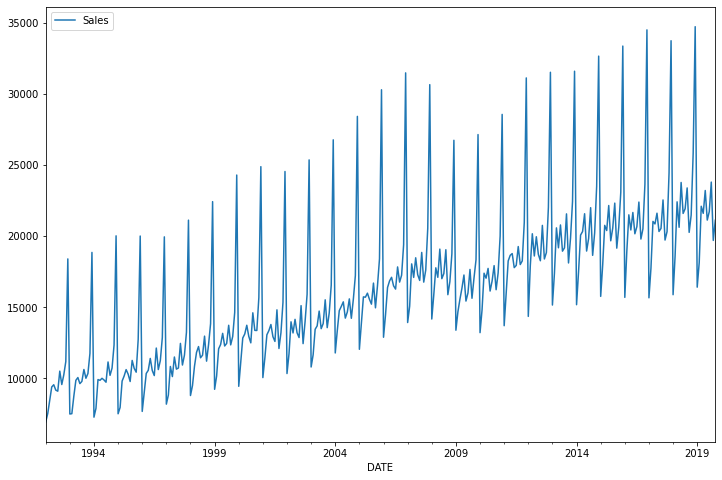

In [6]:
df.plot(figsize=(12,8))

## Train Test Split

In [8]:
df.shape

(334, 1)

In [9]:
len(df)

334

Data is monthly, let's forecast 1.5 years into the future.

In [10]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [11]:
len(df) - 18

316

In [12]:
test_size = 18 #month
test_index = len(df) - test_size

In [15]:
test_index

316

In [16]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [17]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [18]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


## Scales data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
len(test)

18

In [25]:
#we have to choose a batch less than 18
# Let's redefine to get 12 months back and then predict the next month out
length = 12 
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [26]:
X,y = generator[0]

In [30]:
len(X[0])

12

Given 12 month, predict the 13th month

In [27]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [28]:
y

array([[0.02047633]])

In [29]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

## Create the model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
# We're only using one feature in our time series
n_features = 1

In [34]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [38]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [39]:
# fit model
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
304/304 [==============================] - 3s 6ms/step - loss: 0.0246 - val_loss: 0.0178
Epoch 2/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0195 - val_loss: 0.0551
Epoch 3/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0117 - val_loss: 0.0045
Epoch 4/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0034 - val_loss: 0.0068
Epoch 5/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0048 - val_loss: 9.2918e-04
Epoch 6/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0024 - val_loss: 8.7935e-04
Epoch 7/20
304/304 [==============================] - 2s 6ms/step - loss: 9.7732e-04 - val_loss: 0.0037
Epoch 8/20
304/304 [==============================] - 2s 6ms/step - loss: 9.7913e-04 - val_loss: 8.8687e-04


In [40]:
losses = pd.DataFrame(model.history.history)

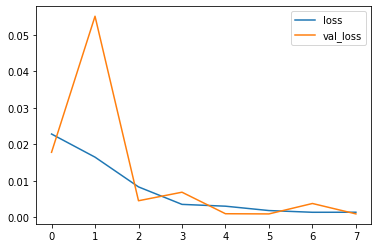

In [41]:
losses.plot()

## Evaluate on Test Data

In [44]:
scaled_train[-length:]

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [46]:
first_eval_batch = scaled_train[-length:]

In [49]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [50]:
model.predict(first_eval_batch)

array([[0.54724824]], dtype=float32)

In [51]:
scaled_test[0]

array([0.61087714])

In [52]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

## Inverse Transformations and Compare

In [53]:
true_predictions = scaler.inverse_transform(test_predictions)

In [55]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22011.405641
2018-06-01,21589,20905.230383
2018-07-01,21919,21026.102610
2018-08-01,23381,22852.195240
2018-09-01,20260,20239.075408
2018-10-01,21473,20769.250770
2018-11-01,25831,24922.708377
2018-12-01,34706,36404.745756
2019-01-01,16410,16254.624506


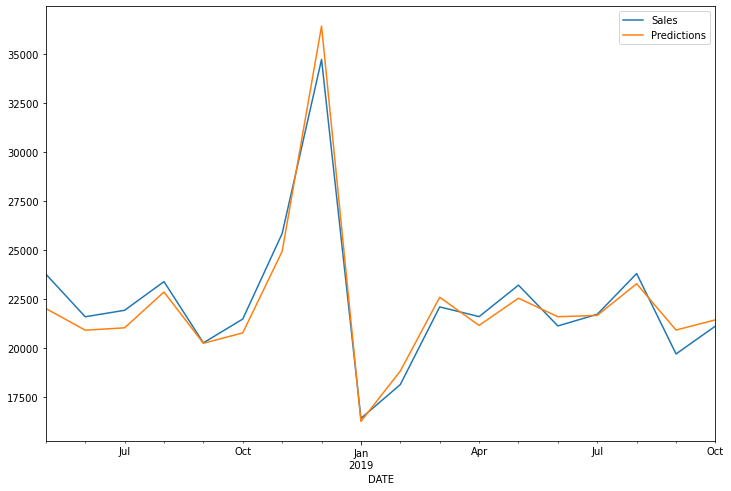

In [57]:
test.plot(figsize=(12,8))

# Retrain and Forecasting

In [58]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [59]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [60]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=8)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
322/322 [==============================] - 3s 6ms/step - loss: 0.0439
Epoch 2/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0252
Epoch 3/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0139
Epoch 4/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0073
Epoch 5/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0016
Epoch 6/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0014
Epoch 7/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0013
Epoch 8/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0017


In [61]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [62]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.


In [63]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [64]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [65]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [66]:
forecast_df

,Forecast
2019-11-01,26071.749736
2019-12-01,36301.890098
2020-01-01,16880.060789
2020-02-01,18489.755128
2020-03-01,21835.868053
2020-04-01,21586.185737
2020-05-01,23140.837934
2020-06-01,21420.295074
2020-07-01,21925.716124
2020-08-01,23799.186385


In [67]:
forecast_df.shape

(12, 1)

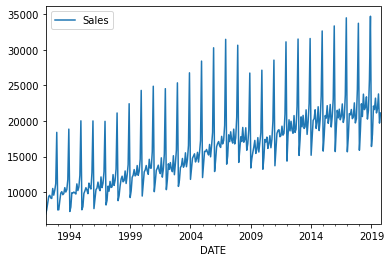

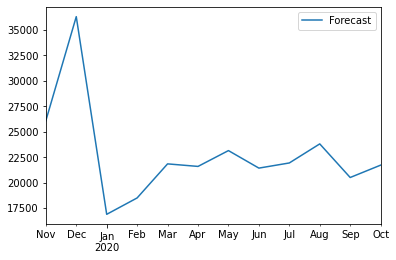

In [68]:
df.plot()
forecast_df.plot()

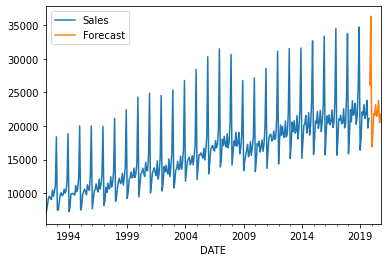

In [69]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

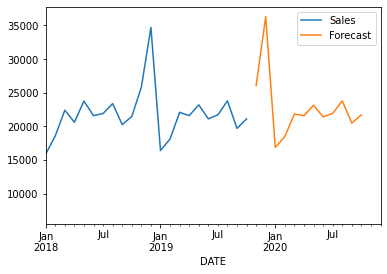

In [70]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')